# Proyek Analisis Data: Bike Sharing Dataset
- Nama: MUHAMMAD TEGAR ABHIRAM
- Email: tagar.abhiram77@student.ub.ac.id
- Id Dicoding: garrr007

## Menentukan Pertanyaan Bisnis
- Bagaimana Variasi Kondisi Cuaca Mempengaruhi Tingkat Penyewaan Sepeda?
- Bagaimana Perbandingan Antara Pengguna Casual dan Registered dalam Jumlah Penyewaan Sepeda?
- Bagaimana Distribusi Penyewaan Sepeda pada Berbagai Rentang Jam?
- Bagaimana Musim Mempengaruhi Pola Penyewaan Sepeda?
- Bagaimana Penyewaan Sepeda pada Hari Kerja Dibandingkan dengan Hari Libur?
- Tren Bulanan Apa yang Terlihat dalam Penyewaan Sepeda?
- Bagaimana Tingkat Korelasi Antara Suhu dan Jumlah Penyewaan Sepeda?

## Menyiapkan semua library yang dibutuhkan

Pada bagian ini kita menyiapkan libary yang sekiranya dibutuhkan,saya menggunakan library numpy,pandas,seaborn dan matpotlib untuk menunjang Analysis Data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Mengumpulkan dan membaca dua datasets yang telah saya pilih dalam format CSV dari URL.

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/garr007/Proyek_Analisis_Data/main/dataset/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/garr007/Proyek_Analisis_Data/main/dataset/hour.csv")

Membuat table day dan table hour

In [3]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Menilai data day_df

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada Datatype yang salah

In [7]:
day_df.duplicated().sum()

0

Tdak terdapat duplicated value

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Tidak ada innacurate value

####Menilai data hour_df

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value

In [10]:
hour_df.duplicated().sum()

0

Tidadk terdapat duplicated value

In [11]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Tidak ada innacurate value

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak ada Datatype yang salah

### Cleaning Data

Kedua data telihat baik,tidak ada missing value,duplicate value,innacurate value dan tipe data pada masing-masing kolom juga tidak ada kesalahan.Tidak ada yang perlu dilakukan pada tahap cleaning data karena tidak ditemukan adanya masalah pada kedua data

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dari rangkuman parameter statistik dapat dilihat ada 731 entri data
Rentang tanggal dari 2011-01-01 hingga 2012-12-31.
Column season memiliki nilai antara 1 sampai 4.
Column weathersit memiliki nilai antara 1 sampai 3.

lalu, untuk column workingday,ika suatu hari bukan merupakan akhir pekan (Sabtu atau Minggu) dan juga bukan hari libur, maka nilai kolom akan diatur sebagai 1. Sebaliknya, jika hari tersebut adalah akhir pekan atau hari libur, maka nilai kolom akan diatur sebagai 0.

Selanjutnya untuk column temp,atemp,hum,dan windspeed berisikan data yang sudah di normalisasi.

Kita juga dapat melihat demografi penyewaan berdasarkan musim,bulan,dan keadaan cuaca yang mempengaruhinya.

Kita juga dapat melihat perbandingan pengguna casual dan registered dimana pengguna registered memiliki rata-rata yang lebih besar hampir tiga kalinya.

Jumlah penyewaan pada hari kerja dan hari libur juga dapat dianalysis.

In [14]:
day_df.groupby(by='weathersit').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


Melihat bagaimana demografi penyewaan berdasarkan cuaca

In [15]:
day_df.groupby(by=['weekday','workingday','holiday']).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

casual  registered     cnt
weekday workingday holiday                            
0       0          0        140521      303506  444027
1       0          1         16760       42845   59605
        1          0         54024      341874  395898
2       0          1           440         573    1013
        1          0         57403      410693  468096
3       0          1          2562        4841    7403
        1          0         54757      410888  465645
4       0          1          1515        2405    3920
        1          0         59945      421530  481475
5       0          1          1082        5412    6494
        1          0         77156      404140  481296
6       0          0        153852      323955  477807

Melihat bagaimana demografi penyewaan berdasarkan weekday,workingday,dan holiday dengan menampilkan jumlah penyewaan.

In [16]:
day_df.groupby(by='cnt').agg({
    'casual' : 'sum',
    'registered' : 'sum'
})

,casual,registered
cnt,,
22,2,20
431,15,416
441,9,432
506,34,472
605,114,491
...,...,...
8294,3410,4884
8362,2469,5893
8395,2512,5883


Melihat perbandingan jumlah penyewaan pengguna casual dan registered.

In [17]:
day_df.groupby(by='season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
}).sort_values(by='cnt',ascending=False)

,casual,registered,cnt
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


Melihat demografi penyewaan berdasarkan musim

In [18]:
day_df.groupby(by='mnth').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
}).sort_values(by='cnt',ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


Melihat demografi penyewaan berdasarkan bulan

In [19]:
hour_df.groupby(by='hr').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
}).sort_values(by='cnt',ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Melihat demografi penyewaan berdasarkan jam

In [20]:
hour_df['hour_group'] = hour_df['hr'].apply(lambda x: 'Early Morning' if 0 <= x < 6 else ('Morning' if 6 <= x < 12 else ('Noon' if 12 <= x < 15 else ('Afternoon' if 15 <= x < 19 else 'night'))))

Mengelompokkan column jam menjadi early morning,morning,noon,afternoon dan night agar lebih mudah dalam melihat trennya

In [21]:
hour_df.groupby(by='hour_group').cnt.sum()

hour_group
Afternoon        1057529
Early Morning     106509
Morning           907319
Noon              544985
night             676337
Name: cnt, dtype: int64

Lalu,melihat demografinya berdasarkan hour_group yang telah dibuat

In [22]:
hour_df.groupby(by='hour_group').agg({
    'temp' :'mean',
    'atemp': 'mean',
    'hum'  : 'mean',
    'windspeed' : 'mean',
    'cnt' : 'sum'
})

,temp,atemp,hum,windspeed,cnt
hour_group,,,,,
Afternoon,0.557340,0.526260,0.509325,0.232633,1057529
Early Morning,0.452937,0.438004,0.720961,0.155375,106509
Morning,0.471096,0.453271,0.671126,0.183152,907319
Noon,0.553367,0.524202,0.515082,0.223373,544985
night,0.497522,0.477561,0.626374,0.185137,676337


In [23]:
day_df['windspeed'].corr(day_df['cnt'])

-0.23454499742166993

Melihat korelasi windspeed dan jumlah penyewaan.Diperoleh hubungan negatif kecil antara dua variable.

In [24]:
day_df['temp'].corr(day_df['cnt'])

0.6274940090334918

Melihat korelasi suhu dan jumlah penyewaan.Diperoleh hubungan positif dan cukup besar yang artinya jika suhu meningkat maka jumlah penyewaan juga meningkat.

In [25]:
hour_df.groupby(by=['hour_group','hr']).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
}).sort_values(by='cnt',ascending=False)

casual  registered     cnt
hour_group    hr                            
Afternoon     17   54220      282640  336860
              18   44496      265276  309772
Morning       8    15761      245240  261001
Afternoon     16   53834      173914  227748
night         19   35505      191284  226789
Noon          13   52713      132206  184919
              12   49718      134696  184414
Afternoon     15   54606      128543  183149
Noon          14   55089      120563  175652
night         20   26378      138172  164550
Morning       9    22458      136980  159438
              7     8037      146134  154171
              11   43286      108034  151320
              10   33789       92468  126257
night         21   20570      104875  125445
              22   16200       79412   95612
              23   11065       52876   63941
Morning       6     3017       52115   55132
Early Morning 0     7375       31755   39130
              1     4709       19455   24164
              2     3412       12940   16352
              5     1012       13249   14261
              3     1893        6281    8174
              4      874        3554    4428

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana Variasi Kondisi Cuaca Mempengaruhi Tingkat Penyewaan Sepeda?

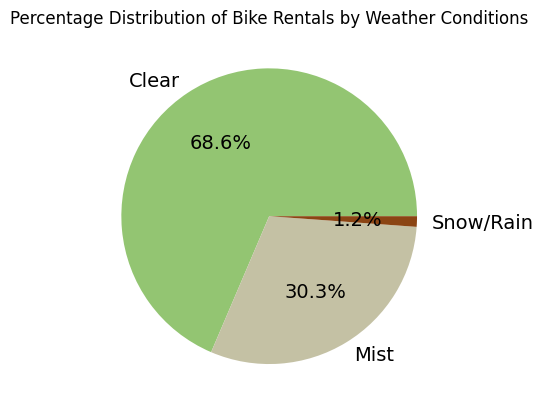

In [26]:
weather_counts = day_df.groupby(by='weathersit').cnt.sum().sort_values(ascending=False)

colors = ('#93C572', '#C4C1A4', '#8B4513')
explode = (0, 0, 0)
labels = {
    1: 'Clear',
    2: 'Mist',
    3: 'Snow/Rain',
}

labels_list = [labels[season] for season in weather_counts.index]

plt.pie(
    x=weather_counts,
    labels=labels_list,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    textprops={'fontsize': 14}
)

plt.title('Percentage Distribution of Bike Rentals by Weather Conditions')
plt.show()


### Pertanyaan 2:
Bagaimana Perbandingan Antara Pengguna Casual dan Registered dalam Jumlah Penyewaan Sepeda?

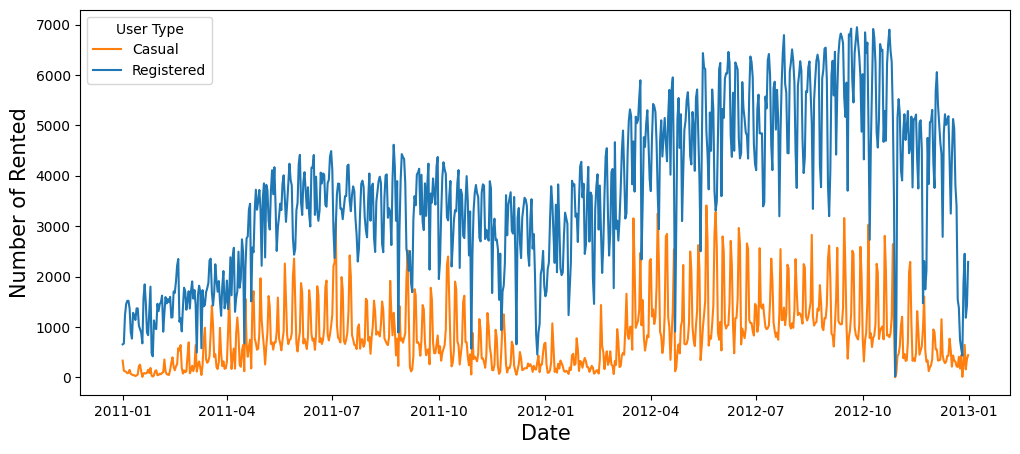

In [27]:
plt.figure(figsize=(12,5))
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
plt.plot(day_df['dteday'], day_df['casual'], color='#ff7f0e', label='Casual')
plt.plot(day_df['dteday'], day_df['registered'], color='#1f77b4', label='Registered')
plt.xlabel('Date',size=15)
plt.ylabel('Number of Rented',size=15)


plt.legend(title='User Type', loc='upper left', labels=['Casual', 'Registered'])
plt.show()

### Pertanyaan 3:
Bagaimana Distribusi Penyewaan Sepeda pada Berbagai Rentang Jam?

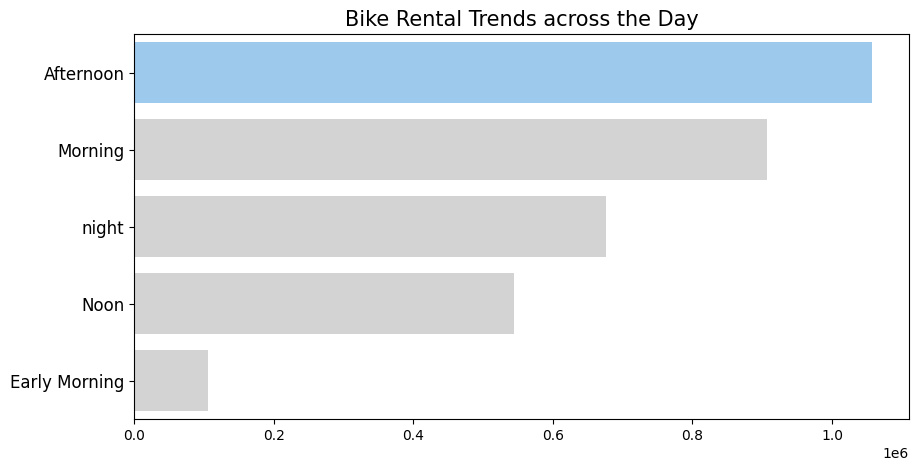

In [28]:
by_hour_group_df = hour_df.groupby(by='hour_group').cnt.sum().reset_index()

plt.figure(figsize=(10,5))
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="cnt",
    y="hour_group",
    data=by_hour_group_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Bike Rental Trends across the Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

##Pertanyaan 4
Bagaimana Musim Mempengaruhi Pola Penyewaan Sepeda?

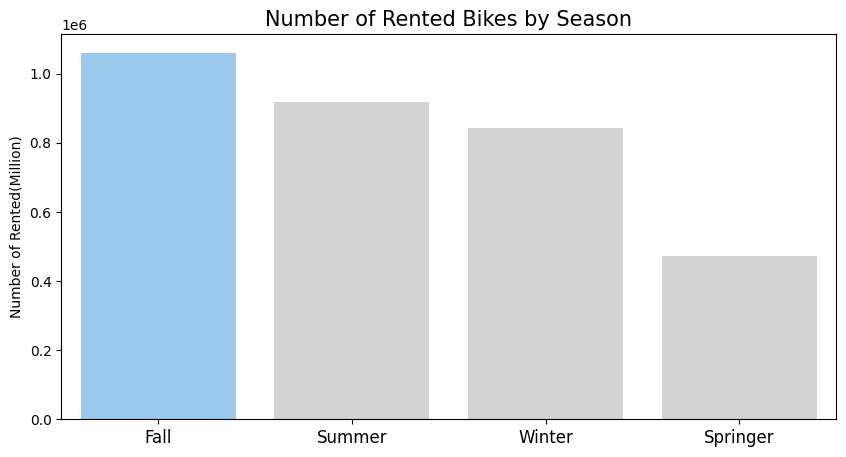

In [29]:
by_season_df = day_df.groupby(by='season').cnt.sum().reset_index()
by_season_df['season'] = by_season_df['season'].replace({1: 'Springer', 2: 'Summer',3:'Fall',4:'Winter'})
plt.figure(figsize=(10,5))
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3","#D3D3D3"]

sns.barplot(
    y='cnt',
    x='season',
    data = by_season_df.sort_values(by='cnt',ascending=False),
    palette=colors
)

plt.title('Number of Rented Bikes by Season',loc='center',fontsize=15)
plt.ylabel('Number of Rented(Million)')
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

##Pertanyaan 5
Bagaimana Penyewaan Sepeda pada Hari Kerja Dibandingkan dengan Hari Libur?

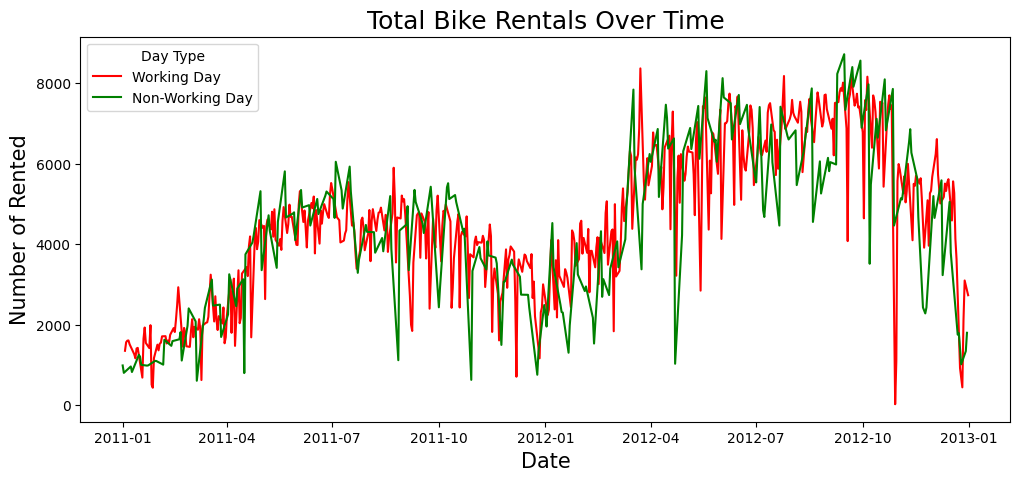

In [30]:
plt.figure(figsize=(12, 5))

plt.plot(day_df[day_df['workingday'] == 1]['dteday'], day_df[day_df['workingday'] == 1]['cnt'], label='Working Day', color='red')
plt.plot(day_df[day_df['workingday'] == 0]['dteday'], day_df[day_df['workingday'] == 0]['cnt'], label='Non-Working Day', color='green')

plt.xlabel('Date', size=15)
plt.ylabel('Number of Rented', size=15)
plt.legend(title='Day Type', loc='upper left')
plt.title('Total Bike Rentals Over Time', size=18)

plt.show()

##Pertanyaan 6
Tren Bulanan Apa yang Terlihat dalam Penyewaan Sepeda?

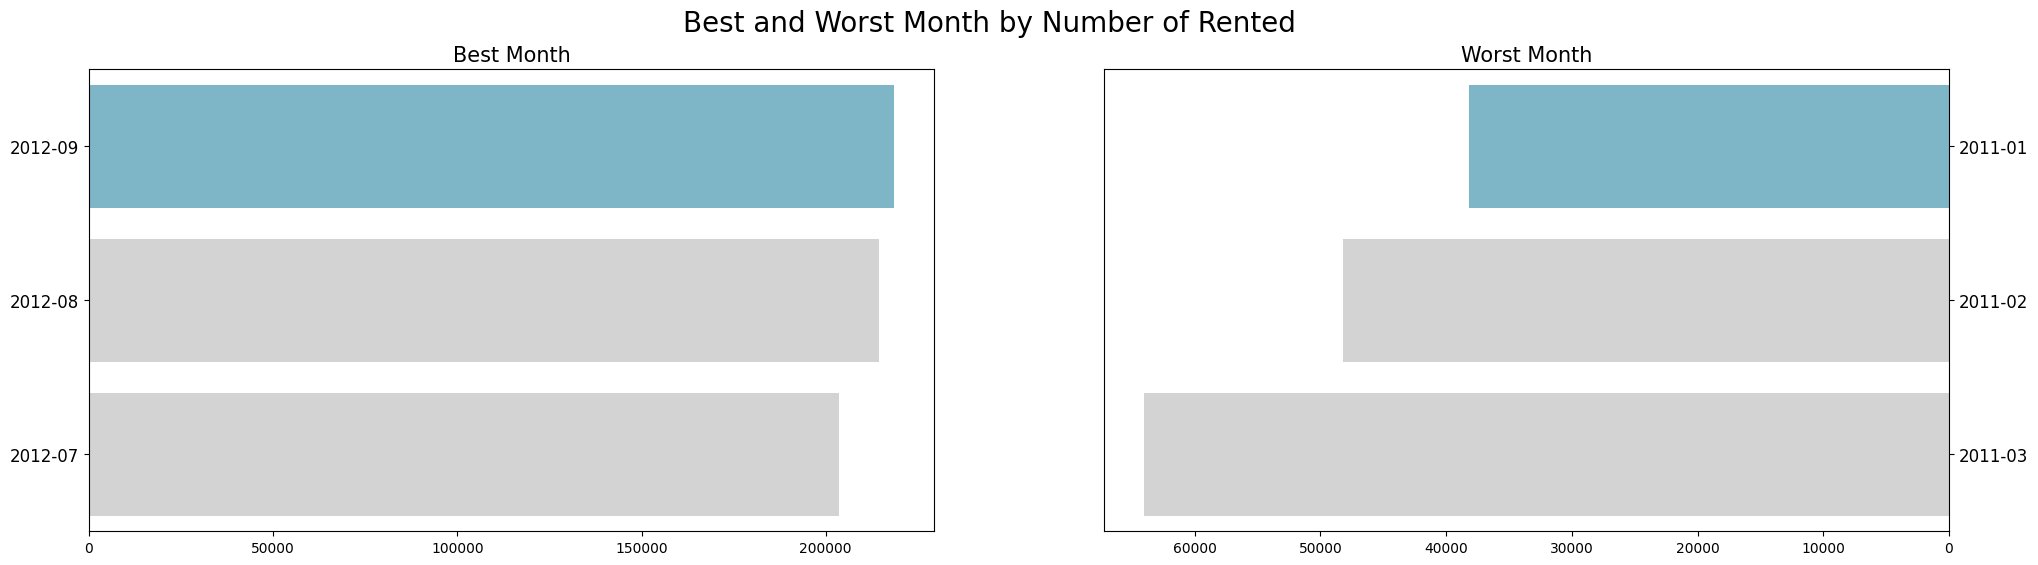

In [31]:
day_df['year_month'] = day_df['dteday'].dt.to_period('M')
monthly_totals = day_df.groupby('year_month').cnt.sum().reset_index()

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(24,6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='cnt',y='year_month',data=monthly_totals.sort_values(by='cnt',ascending=False).head(3),palette=colors,ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Month", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)


sns.barplot(x='cnt',y='year_month',data=monthly_totals.sort_values(by='cnt',ascending=True).head(3),palette=colors,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Month", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Month by Number of Rented", fontsize=20)
plt.show()

##Pertanyaan 7
Bagaimana Tingkat Korelasi Antara Suhu dan Jumlah Penyewaan Sepeda?

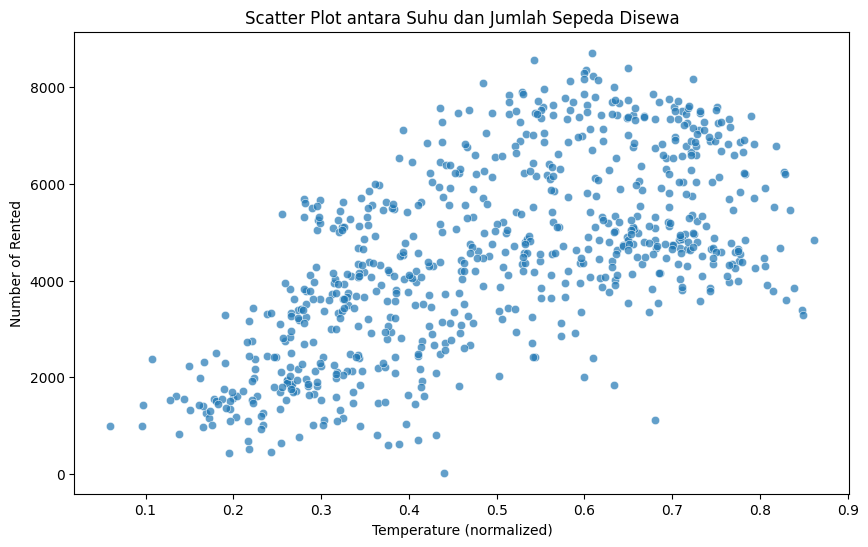

Koefisien Korelasi antara Suhu dan Jumlah Sepeda Dipakai: 0.6274940090334918


In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, alpha=0.7)
plt.title('Scatter Plot antara Suhu dan Jumlah Sepeda Disewa')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Number of Rented')
plt.show()

correlation_coefficient = day_df['temp'].corr(day_df['cnt'])
print(f"Koefisien Korelasi antara Suhu dan Jumlah Sepeda Dipakai: {correlation_coefficient}")

## Conclusion

- Conclution pertanyaan 1<br>
Setelah melakukan analysis,diperoleh persentase distribusi jumlah rental berdasarkan cuaca dengan cuaca 'clear' memiliki persentase paling tinggi yaitu 68.6% diikuti cuaca 'mist' dengan 30.3% dan persentase paling kecil yaitu 1.2% mewakili cuaca 'rain/snow/.Hasil ini mengindikasikan bahwa cuaca sangat berpengaruh terhadap penyewaan sepeda dimana jika cuaca dalam kondisi baik maka jumlah penyewaan akan sangat tinggi begitu juga sebaliknya.
- Conclution pertanyaan 2<br>
Dalam perbandingan antara pengguna casual dan registered, terdapat perbedaan yang cukup besar. Pengguna registered secara konsisten menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan dengan pengguna casual.
- Conclution pertanyaan 3<br>
Setelah menganalisis demografi penyewaan sepeda berdasarkan jam, dapat disimpulkan bahwa puncaknya terjadi pada periode 'afternoon' atau sore hari (jam 3 hingga 6) dan diikuti oleh periode 'morning' atau pagi hari (jam 6 hingga 11). Hal ini dapat dijelaskan oleh tingginya aktivitas mobilisasi pada jam-jam tersebut, terutama saat orang berangkat dan pulang dari pekerjaan.
- Conclution pertanyaan 4<br>
Setelah melakukan demografi berdasarkan musim diperoleh bahwa musim dengan penyewaan tertinggi adalah musim gugur selanjutnya musim panas dan yang paling rendah adalah musim semi.
- Conclution pertanyaan 5<br>
Dalam analisis ini, ditemukan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Bisa disebabkan oleh kebutuhan orang untuk menggunakan sepeda sebagai sarana transportasi saat berangkat dan pulang bekerja.
- Conclution pertanyaan 6<br>
Berdasarkan analisis, diketahui bahwa bulan dengan jumlah penyewaan tertinggi adalah September tahun 2012, sementara bulan dengan penyewaan paling rendah terjadi pada Januari tahun 2011.
- Conclution pertanyaan 7<br>
Berdasarkan analisis korelasi, ditemukan bahwa terdapat korelasi positif yang cukup tinggi antara suhu dan jumlah penyewaan sepeda, dengan nilai korelasi sebesar 0.63. Hasil ini menunjukkan bahwa kenaikan suhu berkorelasi positif dengan peningkatan jumlah penyewaan, yang mengindikasikan bahwa cuaca yang lebih hangat cenderung meningkatkan pengguna untuk menyewa sepeda.